In [1]:
import os
import torch
from prepare_datasets import prepare_datasets
from data_preprocessing import set_seed
from perform_grid_search import perform_grid_search
from train_test import train, validate
from model import GAT
from data_preprocessing import GraphDataset, collate_fn
from dgl.dataloading import GraphDataLoader
from sklearn.metrics import accuracy_score, f1_score
from performance_visualizations import plot_hyperparameter_boxplots
import pandas as pd

c:\Users\barbo\brain classifier repo\brain_classifier\.venv\lib\site-packages\torchdata\datapipes\__init__.py:18: UserWarning: 
################################################################################
WARNING!
The 'datapipes', 'dataloader2' modules are deprecated and will be removed in a
future torchdata release! Please see https://github.com/pytorch/data/issues/1196
to learn more and leave feedback.
################################################################################

  deprecation_warning()
c:\Users\barbo\brain classifier repo\brain_classifier\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# Set random seed for reproducibility
set_seed(42)
base_dir = os.path.dirname(os.getcwd())

In [7]:
# Train test split
train_graphs, train_labels, test_graphs, test_labels, feature_names = prepare_datasets(base_dir)


In [ ]:
# Define hyperparameter grid
param_grid = {
    'num_heads': [1, 2, 3, 4],
    'out_channels': [8, 16],
    'num_epochs': [1],
    'learning_rate': [1e-1, 1e-2, 1e-3, 1e-4],
    'weight_decay': [0, 1e-5, 1e-4]
}

In [15]:
# Define hyperparameter grid
param_grid = {
    'num_heads': [3],
    'out_channels': [16],
    'num_epochs': [1],
    'learning_rate': [1e-1, 1e-2],
    'weight_decay': [0]
}

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Perform grid search with K-fold cross-validation on the training set
best_params, best_val_f1, best_val_accuracy, results_df = perform_grid_search(
    train_graphs=train_graphs,
    train_labels=train_labels,
    num_splits=2,
    param_grid=param_grid,
    batch_size=16,
    model_class=GAT,
    device=device
)

In [18]:
# Save results_df to a CSV file for later analysis
results_df.to_csv('first_grid_search_sc.csv', index=False)

In [2]:
import pandas as pd
results_df = pd.read_csv('first_grid_search_sc.csv')

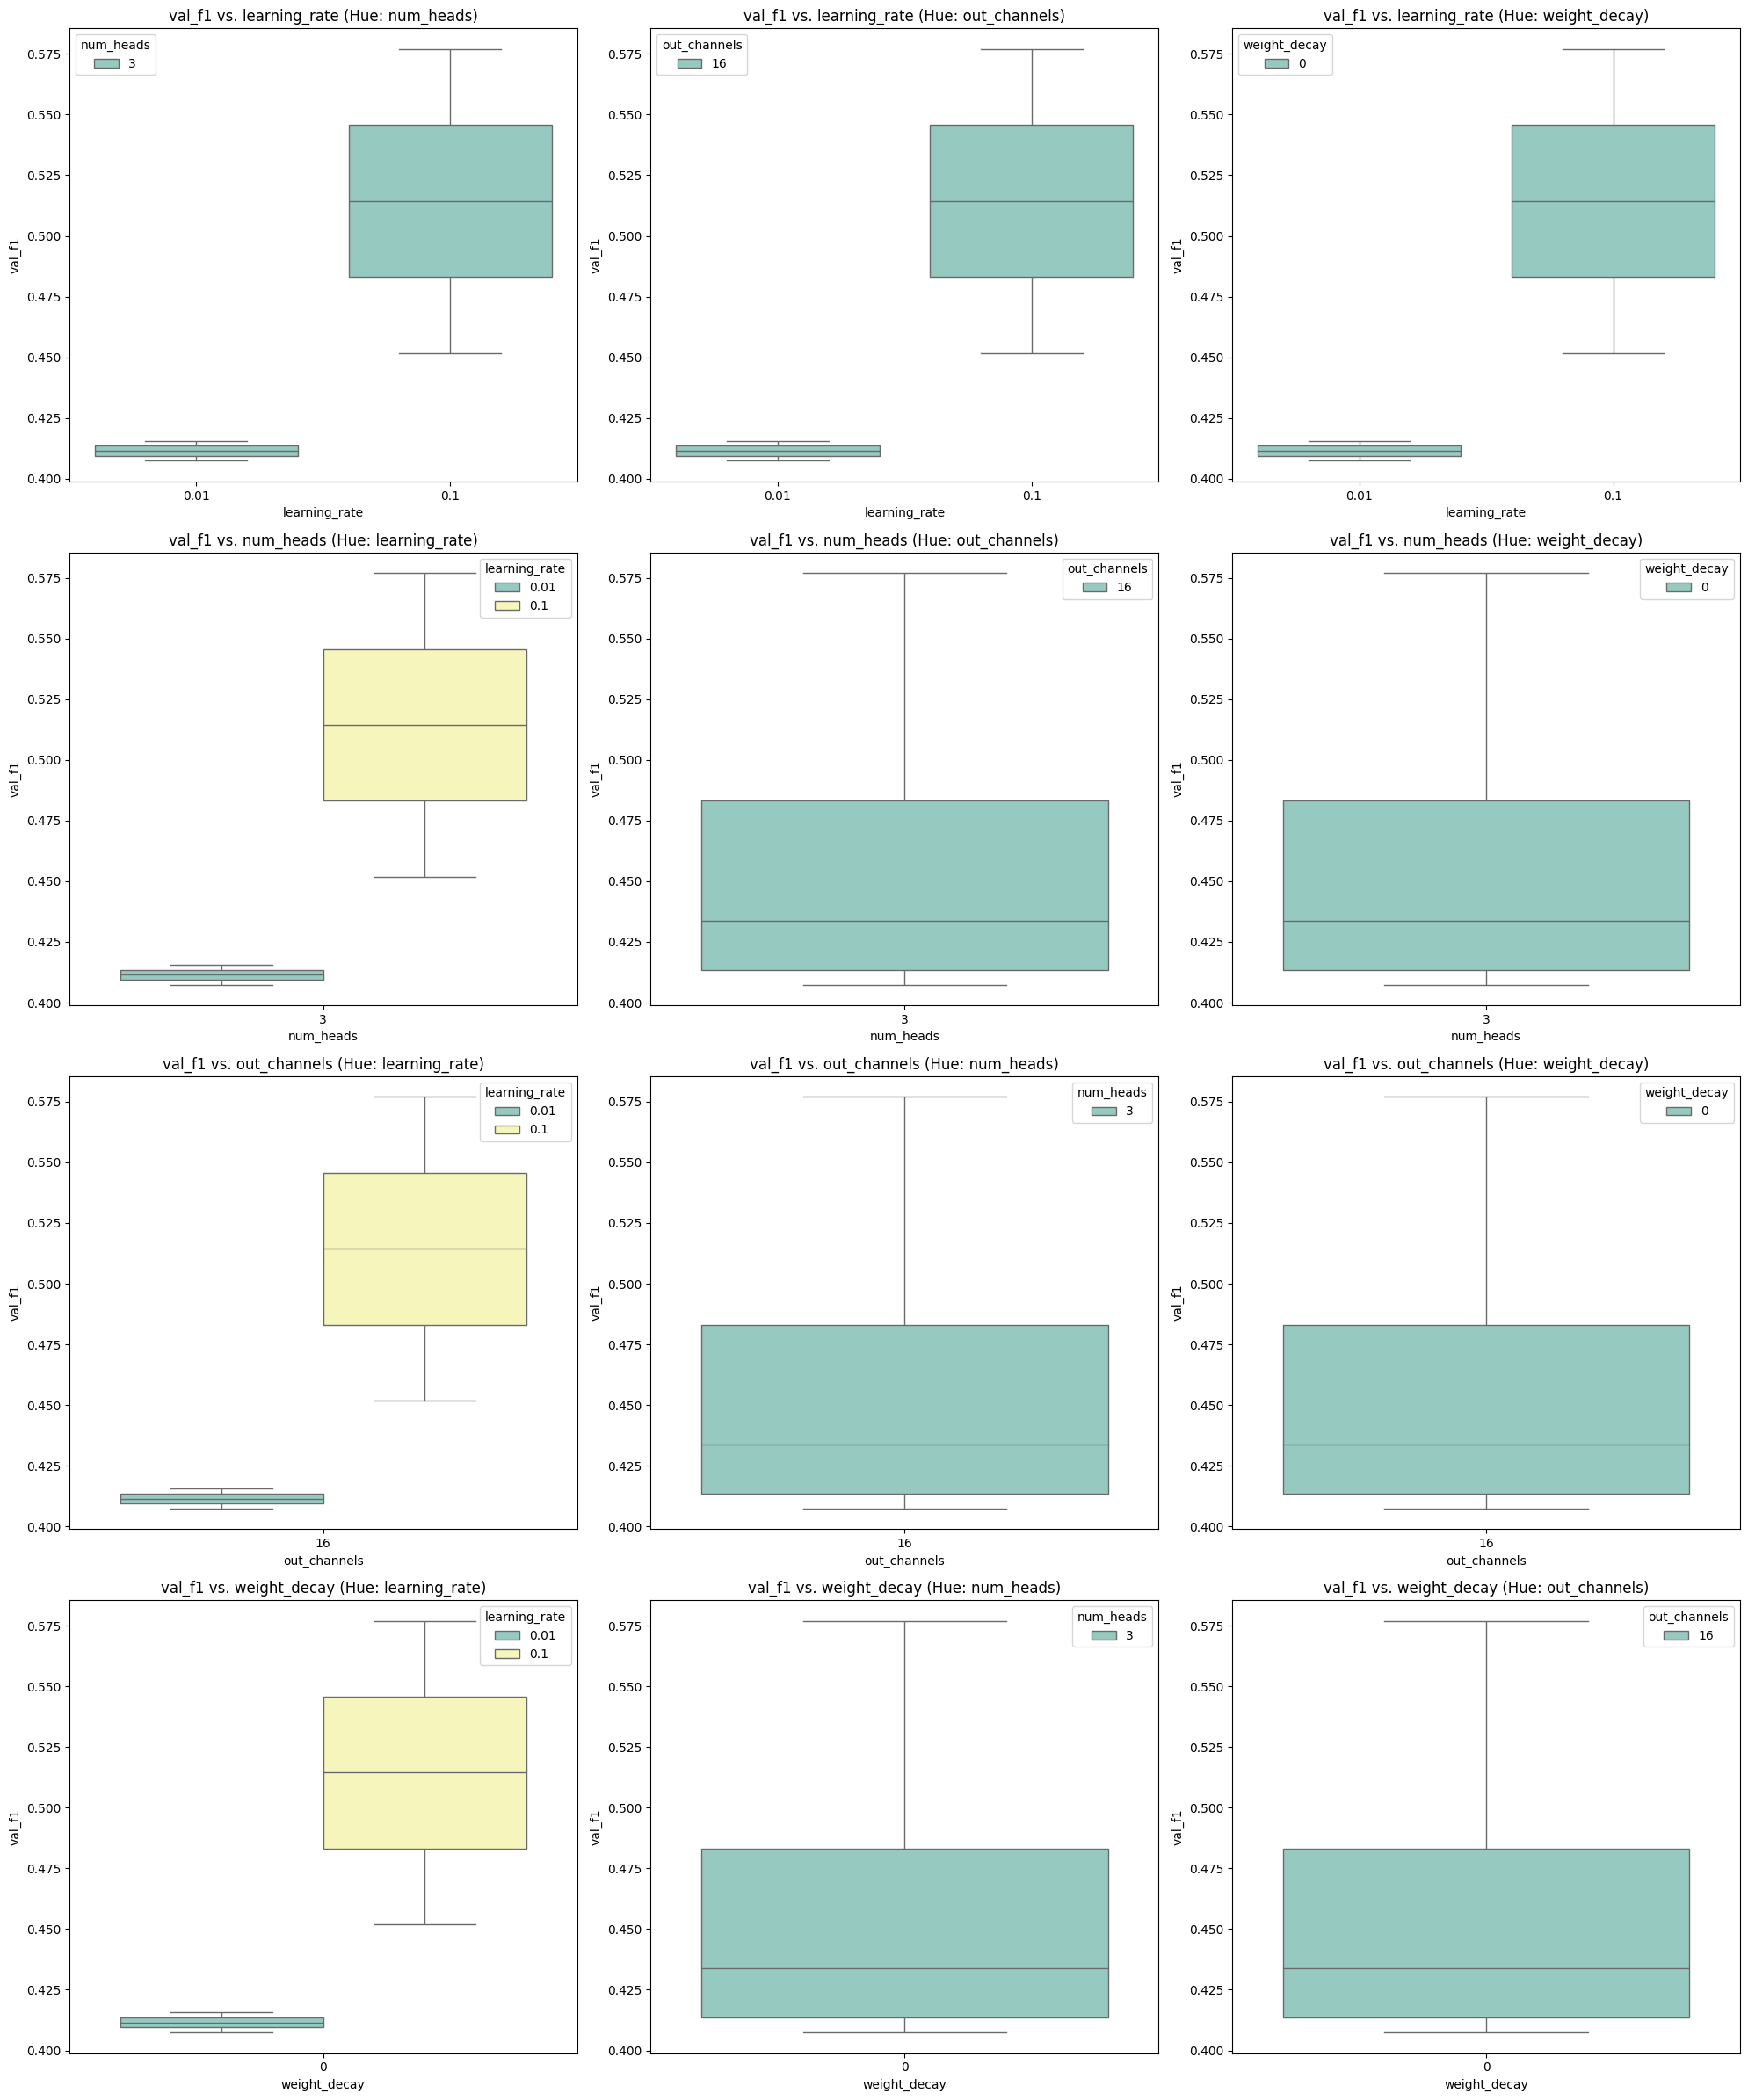

In [3]:
plot_hyperparameter_boxplots(
    results_df=results_df,
    hyperparameters=['learning_rate', 'num_heads', 'out_channels', 'weight_decay'],
    metric='val_f1',
    use_hue=True
)